# Oscillation Presence

Neural oscillations are variably present, and therefore have to be explicitly detected. 

### Issue

Neural activity contains both periodic (oscillatory) and aperiodic activity, which contributes power across all frequencies. Neural oscillations (periodic activity) are variable in their occurrence and frequency. Due to aperiodic activity, there will always be power at any given frequency. 

### Solution

Investigations of neural oscillations should include a _detection_ step, in which the presence of oscillatory activity is explicitly validated. 

This can be done be with spectral parameterization, as the presence of a frequency specific oscillation can be detected as a peak in the power spectrum. 

### Related Work

The following papers include discussion of this topic:

- [Are EEGs mainly rhythmic? Assessment of periodicity in wide-band time series](https://doi.org/10.1016/S0306-4522(03)00208-2), Bullock et al, 2003
- [Scaling Brain Size, Keeping Timing: Evolutionary Preservation of Brain Rhythms](https://doi.org/10.1016/j.neuron.2013.10.002), Buzsaki, Logothetis, Singer, 2013
- [Parameterizing Neural Power Spectra into Periodic and Aperiodic Components](https://doi.org/10.1038/s41593-020-00744-x), Donoghue et al, 2020

### Related Discussion / Examples

The following examples discuss related topics:
- A discusion on
[signal rhythmicity](https://fooof-tools.github.io/fooof/auto_motivations/concepts/plot_DoYouEvenOscillate.html),
and representation of different types of signals in the frequency domain. 
- A discussion on 
[filtering aperiodic activity](https://fooof-tools.github.io/fooof/auto_motivations/concepts/plot_IfYouFilterTheyWillCome.html)
includes discussion and demonstration of filtering aperiodic activity. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fooof.bands import Bands
from fooof.plts.spectra import plot_spectrum, plot_spectrum_shading
from fooof.utils import trim_spectrum

from neurodsp.filt import filter_signal
from neurodsp.spectral import compute_spectrum
from neurodsp.sim import sim_powerlaw, sim_oscillation, sim_combined
from neurodsp.plts.time_series import plot_time_series
from neurodsp.utils import create_times, set_random_seed

## Functions

In [2]:
def savefig(name, fig=None, size=None, loc='figures/', filetype='pdf', save=True):
    
    if not save: return
    if not fig: fig = plt.gcf()
    if size: fig.set_size_inches(size)
    
    fig.savefig(loc + name + '.' + filetype, bbox_inches='tight')

### Settings

In [3]:
import seaborn as sns
sns.set_context('talk')

In [4]:
# Set random seed
set_random_seed(808)

In [5]:
# Define our bands of interest
bands = Bands({'delta' : [2, 4],
               'theta' : [4, 8],
               'alpha' : [8, 13],
               'beta' : [13, 30]})

In [6]:
# Define general simulation settings
n_seconds = 20
fs = 1000

times = create_times(n_seconds, fs)

In [7]:
# Define parameters for the simulations
exp = -1.5
cf = 10
ap_filt = (1.5, 75)

In [8]:
# Set frequency ranges of interest
plt_range = [2, 30]

In [9]:
# Plot settings
plt_kwargs = {'xlabel' : '', 'ylabel' : '', 'lw' : 3}
shade_colors = ['#e8dc35', '#46b870', '#1882d9', '#a218d9']

In [10]:
SAVE_FIG = True

## Aperiodic Signal Are Represented by Power Across all Frequencies

In [11]:
# Simulate a delta function
n_points = len(times)
dirac_sig = np.zeros([n_points])
dirac_sig[round(n_points/2)] = 1

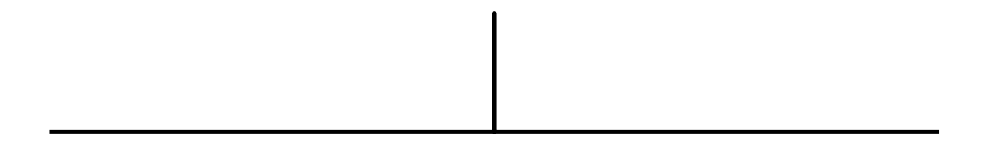

In [12]:
# Plot the time series of the delta signal
plot_time_series(times, dirac_sig, lw=4)
plt.axis('off');
savefig('01-dirac_ts', save=SAVE_FIG)

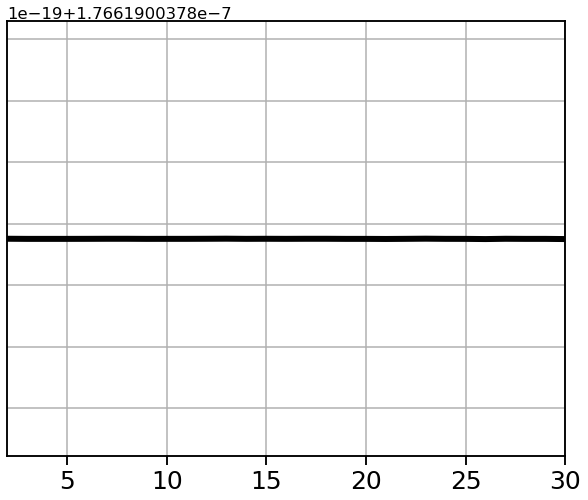

In [13]:
# Compute a power spectrum of the Dirac delta
freqs, powers = compute_spectrum(dirac_sig, fs)
plot_spectrum(*trim_spectrum(freqs, powers, [1.5, 30]), 
              color='black', lw=6, log_powers=False)

plt.xlim(plt_range)

ax = plt.gca()
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
ax.set_xlabel(''); ax.set_ylabel('');
for xlabel_i in ax.get_yticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
    
for tic in ax.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    
savefig('01-dirac_psd', save=SAVE_FIG)

In [14]:
plt_range

[2, 30]

In [15]:
osc_sig = sim_oscillation(n_seconds, fs, 10)

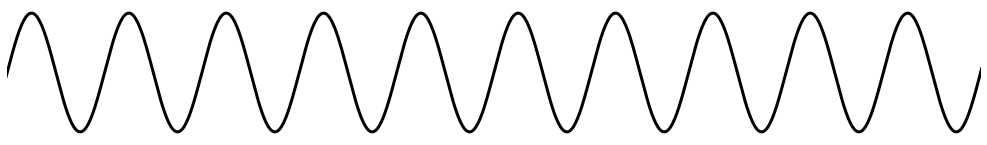

In [16]:
# Plot the time series of the delta signal
plot_time_series(times, osc_sig, lw=3, xlim=[2, 3])
plt.axis('off');
plt.savefig('figures/01-sine-ts.pdf')

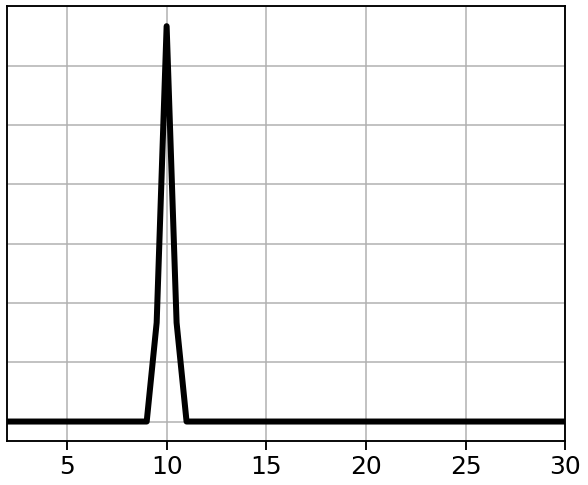

In [17]:
# Compute a power spectrum of the Dirac delta
freqs, powers = compute_spectrum(osc_sig, fs, nperseg=2*fs)
plot_spectrum(*trim_spectrum(freqs, powers, [1, 50]), 
              color='black', lw=6, log_powers=False)

#plt.xlim([0, 52])
plt.xlim(plt_range)

ax = plt.gca()
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
ax.set_xlabel(''); ax.set_ylabel('');
for xlabel_i in ax.get_yticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
    
for tic in ax.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)

savefig('01-sine_psd', save=SAVE_FIG)

## Simulate Aperiodic Time Series

First, let's simulate an example time series. 

For this example, we want to emphasize that measures don't necessarily reflect oscillatory activity. 

To do so, we will simulate a signal with neurally plausible aperiodic activity, but with _no_ oscillations. 

In this scenario, we can examine measurements that reflect only the aperiodic activity. 

In [18]:
# Simulate time series
ap_sig = sim_powerlaw(n_seconds, fs, exponent=exp, f_range=ap_filt)

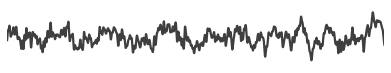

In [19]:
# Plot the simulated time series
_, ax = plt.subplots(figsize=(7, 2))
plot_time_series(times, ap_sig, xlim=(10, 13), alpha=0.75, ax=ax)
plt.axis('off')
plt.savefig('figures/01-ts.pdf', bbox_inches='tight')

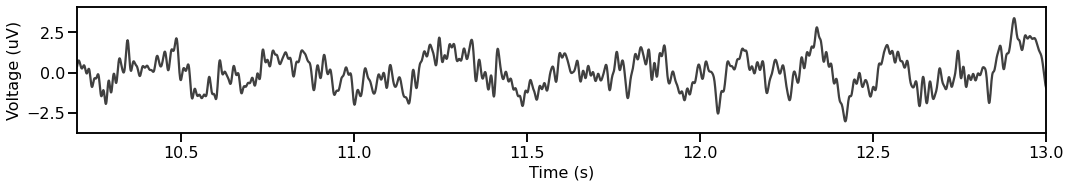

In [20]:
plot_time_series(times, ap_sig, xlim=(10.2, 13), alpha=0.75)#, ax=ax)

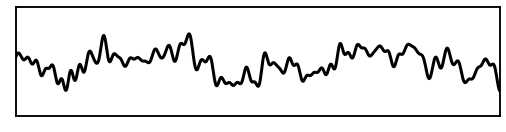

In [21]:
# Zoom in and plot a segment of the simulated signal
st, en = 10.2, 11
_, ax = plt.subplots(figsize=(8, 2.5))
plot_time_series(times, ap_sig, ax=ax, xlim=[st, en], **plt_kwargs)
ax.set_xticks([]); ax.set_yticks([]);
plt.savefig('figures/01-ts-segment.pdf', bbox_inches='tight')

## Compute Power Spectrum

Next, we can compute the power spectrum of our measured signal. 

Since we simulated a signal with aperiodic activity, note that we expect the power spectrum to reflect this 1/f property of the data. 

In [22]:
# Compute power spectrum of the simulated signal
freqs, powers = compute_spectrum(ap_sig, fs, nperseg=fs)

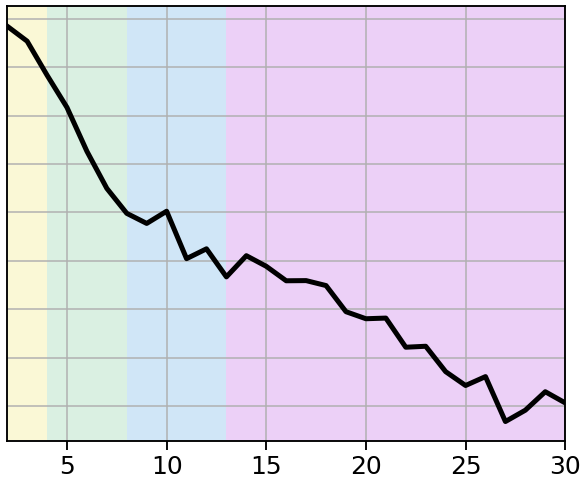

In [23]:
# Plot the power spectrum of the simulated signal
plot_spectrum_shading(*trim_spectrum(freqs, powers, plt_range),
                      lw=5, color='black',
                      shades=bands.definitions, shade_colors=shade_colors, 
                      log_freqs=False, log_powers=True)

plt.xlim(plt_range)

ax = plt.gca()
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
ax.set_xlabel(''); ax.set_ylabel('');
for xlabel_i in ax.get_yticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
    
for tic in ax.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)

plt.savefig('figures/01-ap_psd_col.pdf', bbox_inches='tight')

In the spectrum above we do see the expected 1/f nature of the power spectrum. 

Notably, due to the 1/f there is power across all frequencies, despite there being no _oscillatory_ power. 

## Examine Filtered Ranges

Next, let's examine what the data looks like when filtered in band-specific frequency ranges. 

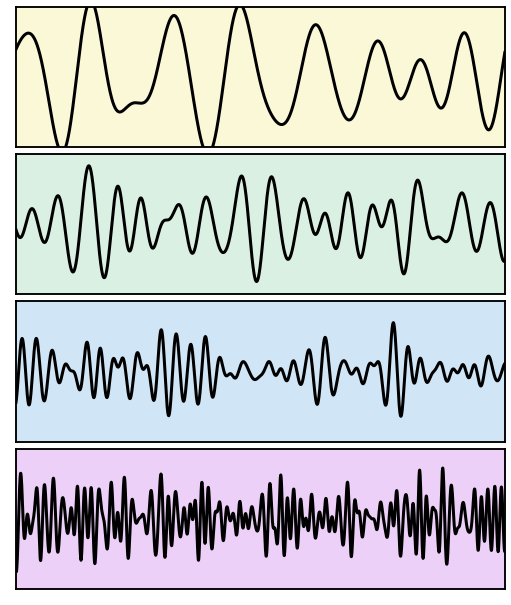

In [24]:
# Create a plot of the data filtered into different frequency ranges
xlim = (5, 8)
_, axes = plt.subplots(len(bands), 1, figsize=(8, 9))
for ax, color, (label, f_range) in zip(axes, shade_colors, bands):

    band_sig = filter_signal(ap_sig, fs, 'bandpass', f_range)
    plot_time_series(times, band_sig, ax=ax, xlim=xlim, ylim=(-1.25, 1.25), **plt_kwargs)
    ax.set_xticks([]); ax.set_yticks([]); 
    ax.axvspan(xlim[0], xlim[1], alpha=0.2, color=color)
    
plt.subplots_adjust(hspace=0.05)
plt.savefig('figures/01-ap_ts_bands.pdf', bbox_inches='tight')

Note in the above filtered data, that there is activity in all bands, and it even seems to have interesting dynamics. 

This is because the aperiodic activity has activity at all frequencies, that can be extracted with filters. 

In addition, the seeming sinusoidality of the filtered traces stems from the filters themselves. 

However, these traces do not reflect true oscillatory activity, and interpreting it as such would be wrong. 

## Compare to a signal with an oscillation

In [25]:
# Simulate time series
#components = {'sim_powerlaw' : {'exponent' : exp, 'f_range' : ap_filt}, 
#              'sim_oscillation' : {'freq' : 10}}
#sig_comb = sim_combined(n_seconds, fs, components, [1, 0.5])

In [26]:
# Simulate a time series with an oscillation, combined with AP from before
osc_sig = sim_oscillation(n_seconds, fs, freq=cf, variance=0.5)

sig_comb = ap_sig + osc_sig

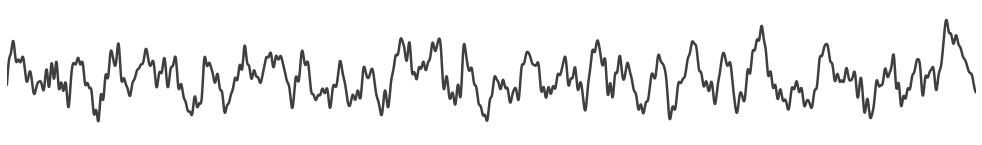

In [47]:
# Plot the simulated time series
#_, ax = plt.subplots(figsize=(8, 3))
plot_time_series(times, sig_comb, xlim=(10, 13), lw=2.5, alpha=0.75)#, ax=ax)
plt.axis('off')
plt.savefig('figures/01-comb_ts.pdf', bbox_inches='tight')

In [28]:
# Compute power spectrum of the simulated signal
freqs, powers = trim_spectrum(*compute_spectrum(sig_comb, fs, nperseg=1.5*fs), plt_range)

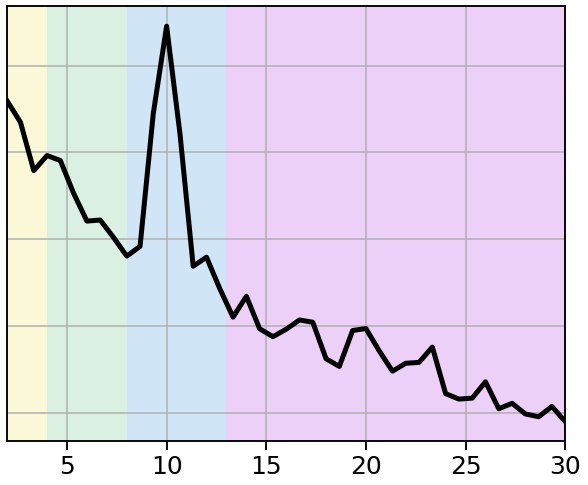

In [29]:
# Plot the power spectrum of the simulated signal
plot_spectrum_shading(freqs, powers,
                      lw=5, color='black',
                      shades=bands.definitions, shade_colors=shade_colors, 
                      log_freqs=False, log_powers=True)
plt.xlim(plt_range)

ax = plt.gca()
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
ax.set_xlabel(''); ax.set_ylabel('');
for xlabel_i in ax.get_yticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
    
for tic in ax.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)

plt.savefig('figures/01-comb_psd_col.pdf', bbox_inches='tight')

In [30]:
from fooof import FOOOF
from fooof.plts.annotate import plot_annotated_model

In [31]:
fm = FOOOF(verbose=False)
fm.fit(freqs, powers)

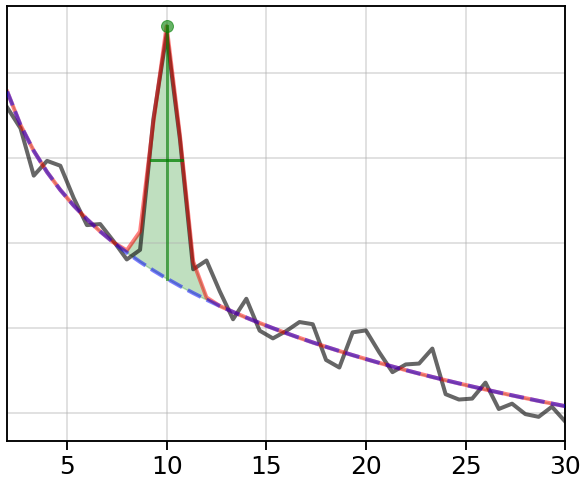

In [32]:
plot_annotated_model(fm, annotate_peaks=False, annotate_aperiodic=False)
plt.gca().get_legend().remove()

plt.xlim(plt_range)

ax = plt.gca()
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
ax.set_xlabel(''); ax.set_ylabel('');
for xlabel_i in ax.get_yticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
    
for tic in ax.yaxis.get_major_ticks():
    tic.tick1line.set_visible(False)


plt.savefig('figures/01-comb_psd_peak.pdf', bbox_inches='tight')

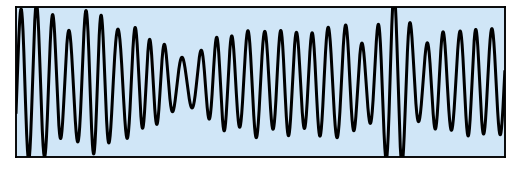

In [33]:
xlim = (5, 8)
_, ax = plt.subplots(figsize=(8, 3))
band_sig = filter_signal(sig_comb, fs, 'bandpass', bands.alpha)
plot_time_series(times, band_sig, ax=ax, xlim=xlim, ylim=(-1.5, 1.5), **plt_kwargs)
ax.set_xticks([]); ax.set_yticks([]); 
ax.axvspan(xlim[0], xlim[1], alpha=0.2, color=shade_colors[2])

plt.savefig('figures/01-alpha_ts_bands.pdf', bbox_inches='tight')

## Explore autocorrelation

In [34]:
from neurodsp.timefrequency import amp_by_time
from neurodsp.aperiodic import compute_autocorr

In [35]:
ac_params = {'max_lag' : 500, 'lag_step' : 5}

In [36]:
amp1 = amp_by_time(ap_sig, fs, (8, 12), remove_edges=False)
amp2 = amp_by_time(sig_comb, fs, (8, 12), remove_edges=False)

In [37]:
ts1, acs1 = compute_autocorr(ap_sig, **ac_params)
ts2, acs2 = compute_autocorr(sig_comb, **ac_params)

ts1, acs1 = compute_autocorr(amp1, **ac_params)
ts2, acs2 = compute_autocorr(amp2, **ac_params)

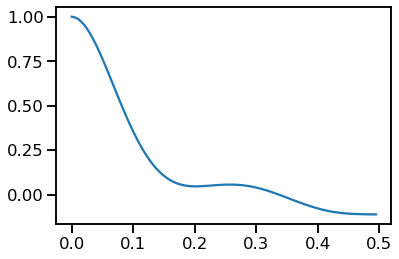

In [38]:
plt.plot(ts1/fs, acs1)

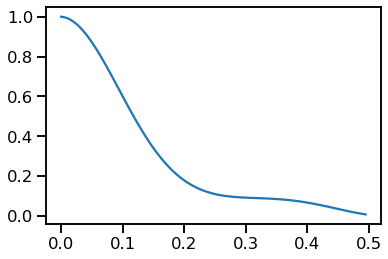

In [39]:
plt.plot(ts2/fs, acs2)

### Conclusion

Neural often, but not always, contains periodic activity. 

Since there is a lot of other activity in neural recordings, measures of particular frequency ranges will always return _some_ activity, even if it is not oscillatory. 

An explicit detection step should be done, in which the presence of oscillatory activity is validated.